##**Tarefa** - **Redes Multilayer Perceptron** (29/10/2023)

**Discente:** Vinícius Venceslau Venancio da Penha

**Docente:** José Alfredo Ferreira Costa

**ELE0606** - Tópicos Especiais em IA

1. Base de Dados - **WINE**:

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Número de vezes que você deseja repetir o treinamento para calcular a média
num_execucoes = 10
acuracias = []
tempo_treinos = []

for n in range(num_execucoes):
    # Passo 1: Carregando os dados
    data = load_wine()
    X, y = data.data, data.target

    # Passo 2: Pré-processamento dos dados (normalização)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Passo 3: Divisão dos dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Passo 4: Criação do Modelo MLP
    mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000)

    # Passo 5: Treinamento do Modelo
    inicio_tempo = time.time()
    mlp.fit(X_train, y_train)
    final_tempo = time.time()
    tempo_treino = final_tempo - inicio_tempo
    tempo_treinos.append(tempo_treino)

    # Passo 6: Avaliação da Acurácia
    y_pred = mlp.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acuracias.append(acc)

# Calculando a média das acurácias e do tempo de treinamento
media_acuracias = sum(acuracias) / num_execucoes
media_tempo_treino = sum(tempo_treinos) / num_execucoes

# Exibindo resultados
print("Média da Acurácia do Modelo MLP:", media_acuracias)
print("Média do Tempo de Treinamento:", media_tempo_treino, "segundos")

Média da Acurácia do Modelo MLP: 0.9703703703703704
Média do Tempo de Treinamento: 0.4122681856155396 segundos


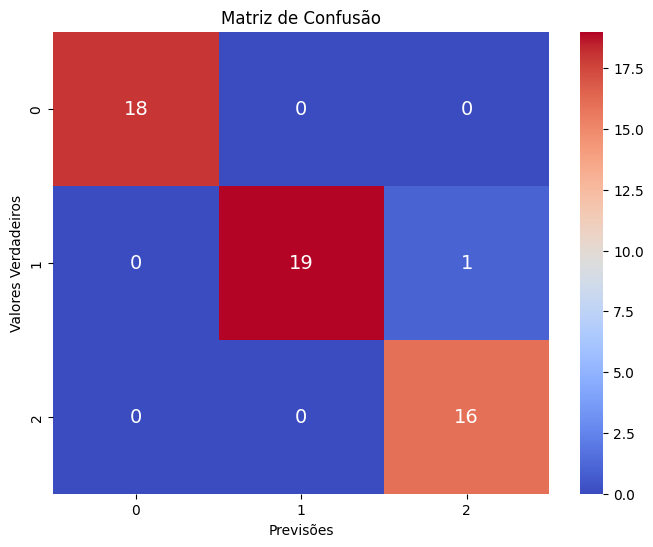

In [2]:
# Criação da matriz confusão

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', annot_kws={"size": 14})

plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

2. Base de Dados - **Heart Disease:**

In [3]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Número de vezes que você deseja repetir o treinamento para calcular a média
num_execucoes = 10
acuracias = []
tempo_treinos = []

# Passo 1: Carregando os dados
data = pd.read_csv("/content/heart.csv")

# Passo 2: Criar um Dataframe
heart_df = data

# Passo 3: Preparar os dados
X = heart_df.drop('target', axis=1).to_numpy()
y = heart_df['target'].to_numpy()

# Passo 4: Normalizar os dados:
scaler = StandardScaler()
X = scaler.fit_transform(X)

for n in range(num_execucoes):
    # Passo 5: Divisão dos dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=None)

    # Passo 6: Criação do Modelo MLP
    mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', max_iter=1000)

    # Passo 7: Treinamento do Modelo
    inicio_tempo = time.time()
    mlp.fit(X_train, y_train)
    final_tempo = time.time()
    tempo_treino = final_tempo - inicio_tempo
    tempo_treinos.append(tempo_treino)

    # Passo 8: Avaliação da Acurácia
    y_pred = mlp.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acuracias.append(acc)

# Calculando a média das acurácias e do tempo de treinamento
media_acuracias = sum(acuracias) / num_execucoes
media_tempo_treino = sum(tempo_treinos) / num_execucoes

# Exibindo resultados
print("Média da Acurácia do Modelo MLP:", media_acuracias)
print("Média do Tempo de Treinamento:", media_tempo_treino, "segundos")

Média da Acurácia do Modelo MLP: 0.9736585365853658
Média do Tempo de Treinamento: 3.26777446269989 segundos


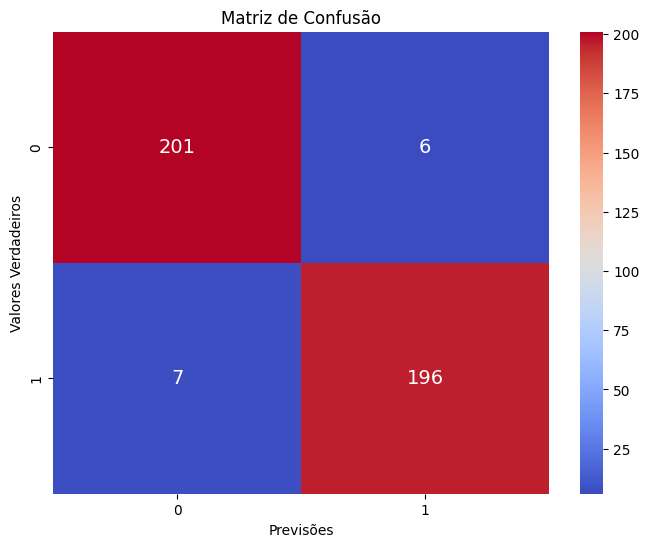

In [4]:
# Criação da matriz confusão

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', annot_kws={"size": 14})

plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()